# 中尺度模式降水预报数据

2018年唐健收集整理了我国主要的区域数值模式的逐小时定量降水数据:

| 模式 | 起报 | 范围 | 时效 | 分辨率 |分辨率 
| :---: | :---: | :---: | :---: | :---: | :---: |
| 华东 | 00,12 | [70,140,0,60] | 72h | 0.1x0.1 | 华东9km模式 |
| GrapesMeso | 00,03,...,12,...21 | [70,145,15,65] | 84h,30h | 0.1x0.1 | 00,12时起报84h时效, 其余30h时效 |
| Grapes3km | 00,12 | [102,135,17,50] | 36h | 0.03x0.03 | 对流尺度分辨率模式 |
| 北京RMAPS模式 | 00,03,...,12,...21 | [70,140,0,60] | 72h,24h | 0.1x0.1 | 00,12时起报72h时效, 其余24h时效 |

各个模式的具体指标参考  https://dc.cma-nwp.org/portal/modal_product.html

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from nmc_met_graphics.plot.china_map import add_china_map_2cartopy
from nmc_met_graphics.cmap.ctables import cm_qpf_nws

## 华东区域模式

- 概述
    - 产品种类: 2米温度、2米相对湿度、2米露点温度、地面温度、东西方向10米风速、南北方向10米风速、地面气压、海平面气压、对流有效位能、对流抑制系数、能见度、综合雷达回波、累计降水、累计降雪、总云量、高空温度、高空相对湿度、高空露点温度、高空位势高度、高空东西方向风速、高空南北方向风速、经度、纬度
    - 格式: grib2
    - 分辨率: 9公里
    - 范围: 涵盖全国区域
    - 时次: 08时、20时两个时次
    - 时效: 72小时
    - 传输方式: 客户端方式
    - 传数据服务区域: 上海
    - 数据生成时间: 08时起报的grib2数据一般在14：30分可以上传到服务器; 20时起报的grib2数据一般在02：30分可以上传达服务器
- 详细说明
    - grib2数据来源为华东区域中尺度数值模式，数据压缩方案为simple_packing。
    - 华东区域中尺度数值模式grib2数据分地面和高空2类数据。
    - 地面要素逐小时提供一个文件,文件名按“中华人民共和国气象行业标准”（详见附件）
    - 高空数据逐3小时提供1个文件,文件名按“中华人民共和国气象行业标准”（详见附件）

In [4]:
file = "I:/shanghai9km/2018061900/shanghai9km_tp_20180619000011.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 601, level: 1, longitude: 701, time: 1)
Coordinates:
  * longitude  (longitude) float32 70.0 70.1 70.2 70.3 ... 139.8 139.9 140.0
  * latitude   (latitude) float32 0.0 0.1 0.2 0.3 0.4 ... 59.7 59.8 59.9 60.0
  * level      (level) float32 0.0
  * time       (time) datetime64[ns] 2018-06-19
Data variables:
    fhour      (time) timedelta64[ns] ...
    tp         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:        COARDS
    Product:            SMS_WARMS/SHANGHAI Meso Forecast
    Institution:        National Meteorological Center OF CMA
    RunTime:            2018-06-19T00:00:00Z
    ValidTime:          2018-06-19T00:00:00Z
    StartForecastHour:  -1
    EndForecastHour:    0
    History:            Created time: 2018-11-17T00:47:25

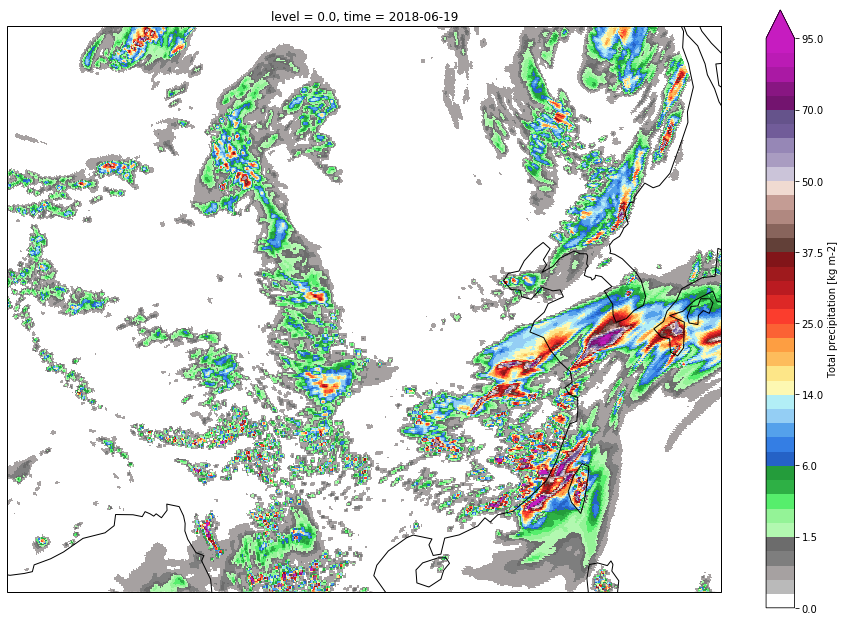

In [22]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105))
ax.set_extent((80, 130, 18, 55),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds['tp'].isel(time=0,level=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

## GrapesMeso模式

### GRAPES-MESO
- 概述
    - 产品种类: 2米温度、2米相对湿度、地面温度、东西方向10米风速、南北方向10米风速、地面气压、海平面气压、对流有效位能、对流抑制系数、综合雷达回波、累计降水、高空温度、高空相对湿度、高空露点温度、高空位势高度、高空东西方向风速、高空南北方向风速、经度、纬度
    - 格式: grib2
    - 分辨率: 0.1度
    - 范围: 涵盖全国区域
    - 时次: 08时、20时两个时次
    - 时效: 84小时
    - 传输方式: 客户端方式
    - 传数据服务区域: 全国
    - 数据生成时间: 08时起报的grib2数据一般在16：00分可以上传到服务器 20时起报的grib2数据一般在5：10分可以上传达服务器
- 详细说明
    - grib2数据来源为GRAPES-MESO中尺度数值模式，数据压缩方案为jpeg2000。
    - 全部要素逐小时提供一个文件，文件名按“中华人民共和国气象行业标准”（详见附件）
    - 提供利用wgrib2方式直接提取数据转为二进制码和使用GRADS软件直接绘图的说明（详见附件）
    - 在/grapes_meso/readme提供NCL绘图范例draw_case.ncl(附件4) 和地形高度和土地利用文件和读程序

### GRAPES-RAFS
- 概述
    - 产品种类: 2米温度、2米相对湿度、地面温度、东西方向10米风速、南北方向10米风速、地面气压、海平面气压、对流有效位能、对流抑制系数、综合雷达回波、累计降水、高空温度、高空相对湿度、高空露点温度、高空位势高度、高空东西方向风速、高空南北方向风速、经度、纬度
    - 格式: grib2
    - 分辨率: 0.1度
    - 范围: 涵盖全国区域
    - 时次: 02时、05时、08时、11时、14时、17时、20时、23时八个时次
    - 时效: 30小时
    - 传输方式: 客户端方式
    - 传数据服务区域: 全国
    - 数据生成时间: 02时:4:50-5:20; 05时:7:50-8:20; 08时:10:50-11:10; 时:13:50-14:15; 14时：16:50-17:20；17时:19:50-20:20 20时: 22:50-23:20; 时: 1:50-2:20
- 详细说明
    - grib2数据来源为GRAPES-RAFS中尺度数值模式，数据压缩方案为jpeg2000。
    - 所有产品逐小时提供一个文件，文件名按“中华人民共和国气象行业标准”（详见附件）
    - 提供利用wgrib2方式直接提取数据转为二进制码和使用GRADS软件直接绘图的说明（详见附件）
    - 在/grapes_rafs/readme提供NCL绘图范例draw_case.ncl(附件4)和地形高度与土地利用文件及读程序（详见附件）

In [23]:
file = "I:/grapesMeso/2018061900/grapesMeso_ncpcp_20180619000011.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 501, longitude: 751, time: 1)
Coordinates:
  * longitude  (longitude) float32 70.0 70.1 70.2 70.3 ... 144.8 144.9 145.0
  * latitude   (latitude) float32 65.0 64.9 64.8 64.7 ... 15.3 15.2 15.1 15.0
  * time       (time) datetime64[ns] 2018-06-19T11:00:00
Data variables:
    ncpcp      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-11-14 21:32:16 GMT by grib_to_netcdf-2.8.0: grib_to_ne...

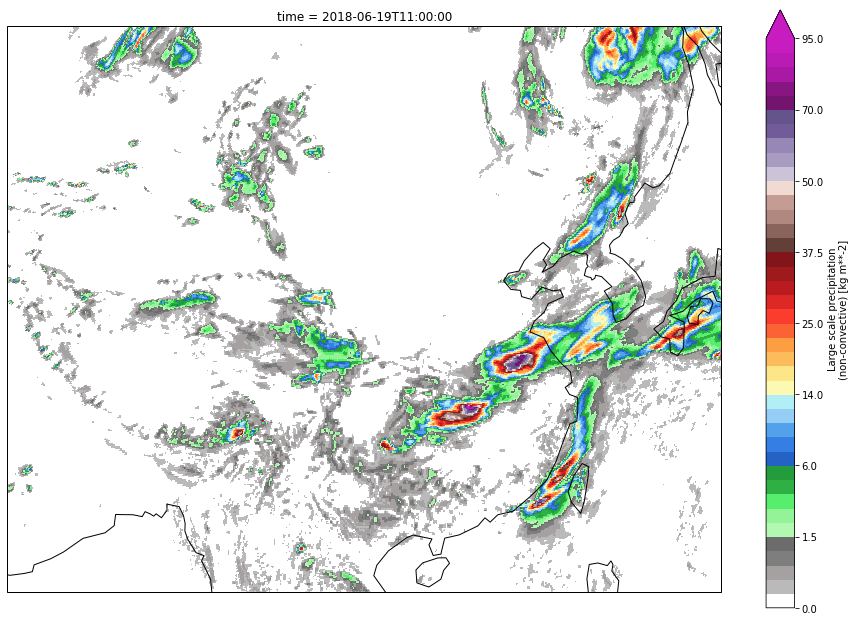

In [24]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105))
ax.set_extent((80, 130, 18, 55),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds['ncpcp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

In [25]:
file = "I:/grapesMeso/2018061900/grapesMeso_acpcp_20180619000011.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 501, longitude: 751, time: 1)
Coordinates:
  * longitude  (longitude) float32 70.0 70.1 70.2 70.3 ... 144.8 144.9 145.0
  * latitude   (latitude) float32 65.0 64.9 64.8 64.7 ... 15.3 15.2 15.1 15.0
  * time       (time) datetime64[ns] 2018-06-19T11:00:00
Data variables:
    acpcp      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-11-14 21:28:35 GMT by grib_to_netcdf-2.8.0: grib_to_ne...

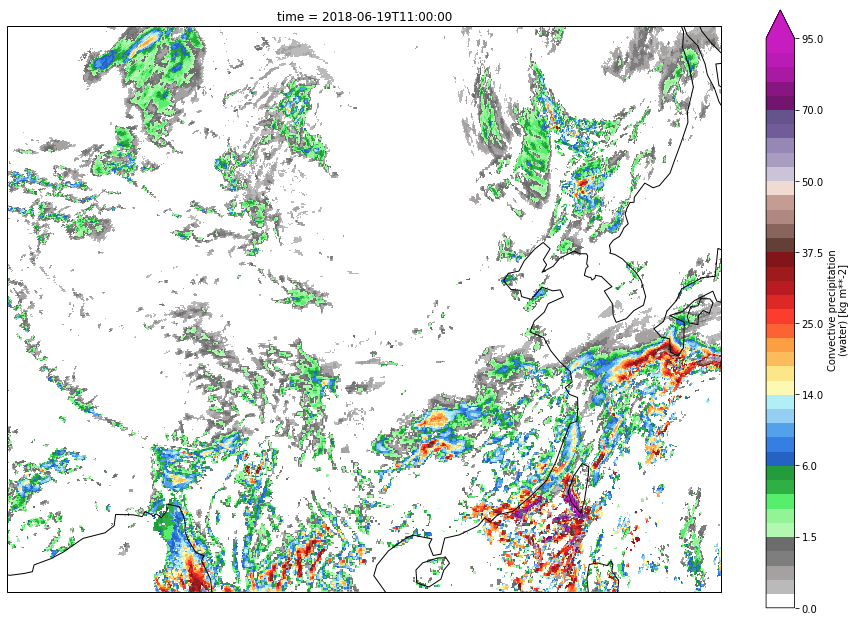

In [26]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105))
ax.set_extent((80, 130, 18, 55),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds['acpcp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

## 北京区域模式

- 概述
    - 产品种类: 2米温度、2米相对湿度、2米露点温度、地面温度、东西方向10米风速、南北方向10米风速、地面气压、海平面气压、对流有效位能、对流抑制系数、能见度、综合雷达回波、累计降水、累计降雪、总云量、高空温度、高空相对湿度、高空露点温度、高空位势高度、高空东西方向风速、高空南北方向风速、经度、纬度
    - 格式: grib2
    - 分辨率: 9公里
    - 范围: 涵盖全国区域
    - 时次: 08时、20时两个时次
    - 时效: 48小时
    - 传输方式: 客户端方式
    - 传数据服务区域: 北京
    - 数据生成时间: 08时起报的grib2数据一般在11：30分可以上传到服务器; 20时起报的grib2数据一般在23：30分可以上传达服务器
- 详细说明
    - grib2数据来源为华北区域中尺度数值模式，数据压缩方案为simple_packing。
    - 华北区域中尺度数值模式grib2数据逐小时提供一个文件。
    - 文件中包括的地面和高空要素如下：（wgrib2读出的变量名）

In [4]:
file = "I:/rmaps/2018061900/rmaps_tp_20180619000011.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 601, level: 1, longitude: 701, time: 1)
Coordinates:
  * longitude  (longitude) float32 70.0 70.1 70.2 70.3 ... 139.8 139.9 140.0
  * latitude   (latitude) float32 0.0 0.1 0.2 0.3 0.4 ... 59.7 59.8 59.9 60.0
  * level      (level) float32 0.0
  * time       (time) datetime64[ns] 2018-06-19T11:00:00
Data variables:
    fhour      (time) timedelta64[ns] ...
    tp         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:        COARDS
    Product:            RMAPS/Beijing Meso Forecast
    Institution:        National Meteorological Center OF CMA
    RunTime:            2018-06-19T00:00:00Z
    ValidTime:          2018-06-19T11:00:00Z
    StartForecastHour:  10
    EndForecastHour:    11
    History:            Created time: 2018-11-17T02:32:41

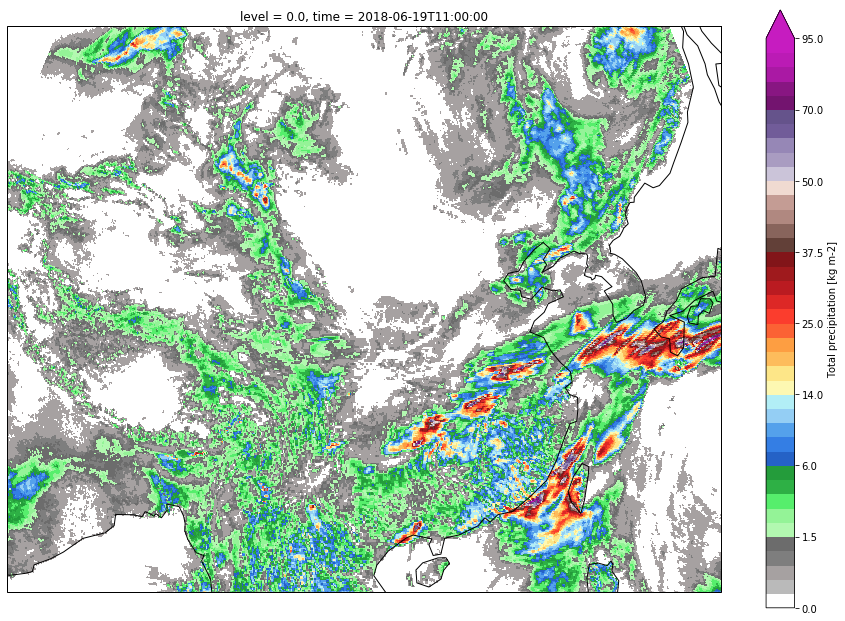

In [5]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105))
ax.set_extent((80, 130, 18, 55),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds['tp'].isel(time=0,level=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

## Grape3km模式

- 概述
    - 产品种类: 2米温度、地面温度、东西方向10米风速、南北方向10米风速、地面气压、海平面气压、综合雷达回波、大尺度降水、经度、纬度
    - 格式: grib2
    - 分辨率: 0.03度
    - 范围: 涵盖全国重点区域(50N-17N,102E-135E)
    - 时次: 00时、12时两个时次
    - 时效: 36小时
    - 传输方式: 客户端方式
    - 传数据服务区域: 全国
    - 数据生成时间: 00时: 4:50-5:20 12时: 7:50-8:20

In [7]:
file = "I:/Level_00/grapes3km/2018061900/grapes3km_ncpcp_20180619000011.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 1101, longitude: 1101, time: 1)
Coordinates:
  * longitude  (longitude) float32 102.0 102.03 102.06 ... 134.94 134.97 135.0
  * latitude   (latitude) float32 50.0 49.97 49.94 49.91 ... 17.06 17.03 17.0
  * time       (time) datetime64[ns] 2018-06-19T11:00:00
Data variables:
    ncpcp      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-11-12 23:24:28 GMT by grib_to_netcdf-2.8.0: grib_to_ne...

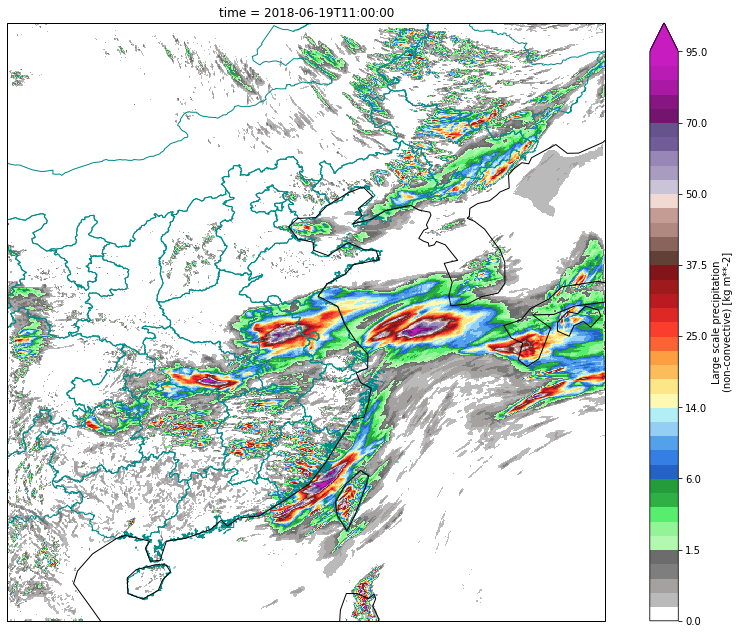

In [9]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=117))
ax.set_extent((102, 135, 17, 50),crs=datacrs)
add_china_map_2cartopy(ax, name='province', edgecolor='darkcyan', lw=1)
cmap, norm = cm_qpf_nws(atime=1)
ds['ncpcp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()